In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사상구"
region_code = "11"
target_date = "2018-01-04"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사상구2018_1q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2018-01-04,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6675,사상구,8070,사상구,1395,20.9%,"7,373"
1,2018-01-04,간장,오복왕표 0.9ℓ 1병,6300,사상구,10710,사상구,4410,70.0%,"8,505"
2,2018-01-04,달걀,오경슈퍼란60g정도 10개,2780,사상구,2790,사상구,10,0.36%,"2,785"
3,2018-01-04,닭고기,육계 1.0㎏,7609,사상구,8500,사상구,891,11.71%,"8,055"
4,2018-01-04,대파,1.0㎏,2877,사상구,3790,사상구,913,31.73%,"3,334"
5,2018-01-04,돼지고기,삼겹살 500g,7200,사상구,8950,사상구,1750,24.31%,"8,075"
6,2018-01-04,두부,500g 판두부(국산포장두부 420g) 1모,4365,사상구,4365,사상구,0,0.0%,"4,365"
7,2018-01-04,라면,신라면 120g 1봉지,676,사상구,676,사상구,0,0.0%,676
8,2018-01-04,맥주,하이트 500㎖ 1병,1410,사상구,1500,사상구,90,6.38%,"1,455"
9,2018-01-04,무,2.0㎏ 1개,1978,사상구,1984,사상구,6,0.3%,"1,981"


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사상구"
region_code = "11"
target_date = "2018-04-12"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사상구2018_2q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2018-04-12,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6675,사상구,9666,사상구,2991,44.81%,"8,171"
1,2018-04-12,간장,오복왕표 0.9ℓ 1병,6300,사상구,10710,사상구,4410,70.0%,"8,505"
2,2018-04-12,달걀,오경슈퍼란60g정도 10개,2290,사상구,2780,사상구,490,21.4%,"2,535"
3,2018-04-12,닭고기,육계 1.0㎏,8900,사상구,8990,사상구,90,1.01%,"8,945"
4,2018-04-12,대파,1.0㎏,2257,사상구,2290,사상구,33,1.46%,"2,274"
5,2018-04-12,돼지고기,삼겹살 500g,7100,사상구,10400,사상구,3300,46.48%,"8,750"
6,2018-04-12,두부,500g 판두부(국산포장두부 420g) 1모,4365,사상구,4365,사상구,0,0.0%,"4,365"
7,2018-04-12,라면,신라면 120g 1봉지,676,사상구,676,사상구,0,0.0%,676
8,2018-04-12,맥주,하이트 500㎖ 1병,1400,사상구,1410,사상구,10,0.71%,"1,405"
9,2018-04-12,무,2.0㎏ 1개,3266,사상구,4222,사상구,956,29.27%,"3,744"


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사상구"
region_code = "11"
target_date = "2018-07-12"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사상구2018_3q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2018-07-12,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8175,사상구,9666,사상구,1491,18.24%,"8,921"
1,2018-07-12,간장,오복왕표 0.9ℓ 1병,6300,사상구,10710,사상구,4410,70.0%,"8,505"
2,2018-07-12,달걀,오경슈퍼란60g정도 10개,2390,사상구,2780,사상구,390,16.32%,"2,585"
3,2018-07-12,닭고기,육계 1.0㎏,6990,사상구,8300,사상구,1310,18.74%,"7,645"
4,2018-07-12,대파,1.0㎏,2828,사상구,2990,사상구,162,5.73%,"2,909"
5,2018-07-12,돼지고기,삼겹살 500g,9900,사상구,11400,사상구,1500,15.15%,"10,650"
6,2018-07-12,두부,500g 판두부(국산포장두부 420g) 1모,4365,사상구,4365,사상구,0,0.0%,"4,365"
7,2018-07-12,라면,신라면 120g 1봉지,676,사상구,676,사상구,0,0.0%,676
8,2018-07-12,맥주,하이트 500㎖ 1병,1400,사상구,1410,사상구,10,0.71%,"1,405"
9,2018-07-12,무,2.0㎏ 1개,2117,사상구,2119,사상구,2,0.09%,"2,118"


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사상구"
region_code = "11"
target_date = "2018-10-11"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사상구2018_4q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2018-10-11,가루비누,"세탁용세제(LG테크),가루형,3.0kg",5925,사상구,11900,사상구,5975,100.84%,"8,913"
1,2018-10-11,간장,오복왕표 0.9ℓ 1병,11900,사상구,11900,사상구,0,0.0%,"11,900"
2,2018-10-11,고등어,30㎝정도 500g 1마리,4639,사상구,6950,사상구,2311,49.82%,"5,795"
3,2018-10-11,달걀,오경슈퍼란60g정도 10개,2680,사상구,2690,사상구,10,0.37%,"2,685"
4,2018-10-11,닭고기,육계 1.0㎏,8990,사상구,9800,사상구,810,9.01%,"9,395"
5,2018-10-11,대파,1.0㎏,3346,사상구,3980,사상구,634,18.95%,"3,663"
6,2018-10-11,돼지고기,삼겹살 500g,9450,사상구,9900,사상구,450,4.76%,"9,675"
7,2018-10-11,두부,500g 판두부(국산포장두부 420g) 1모,4253,사상구,4253,사상구,0,0.0%,"4,253"
8,2018-10-11,라면,신라면 120g 1봉지,3380,사상구,3380,사상구,0,0.0%,"3,380"
9,2018-10-11,맥주,하이트 500㎖ 1병,1400,사상구,1410,사상구,10,0.71%,"1,405"


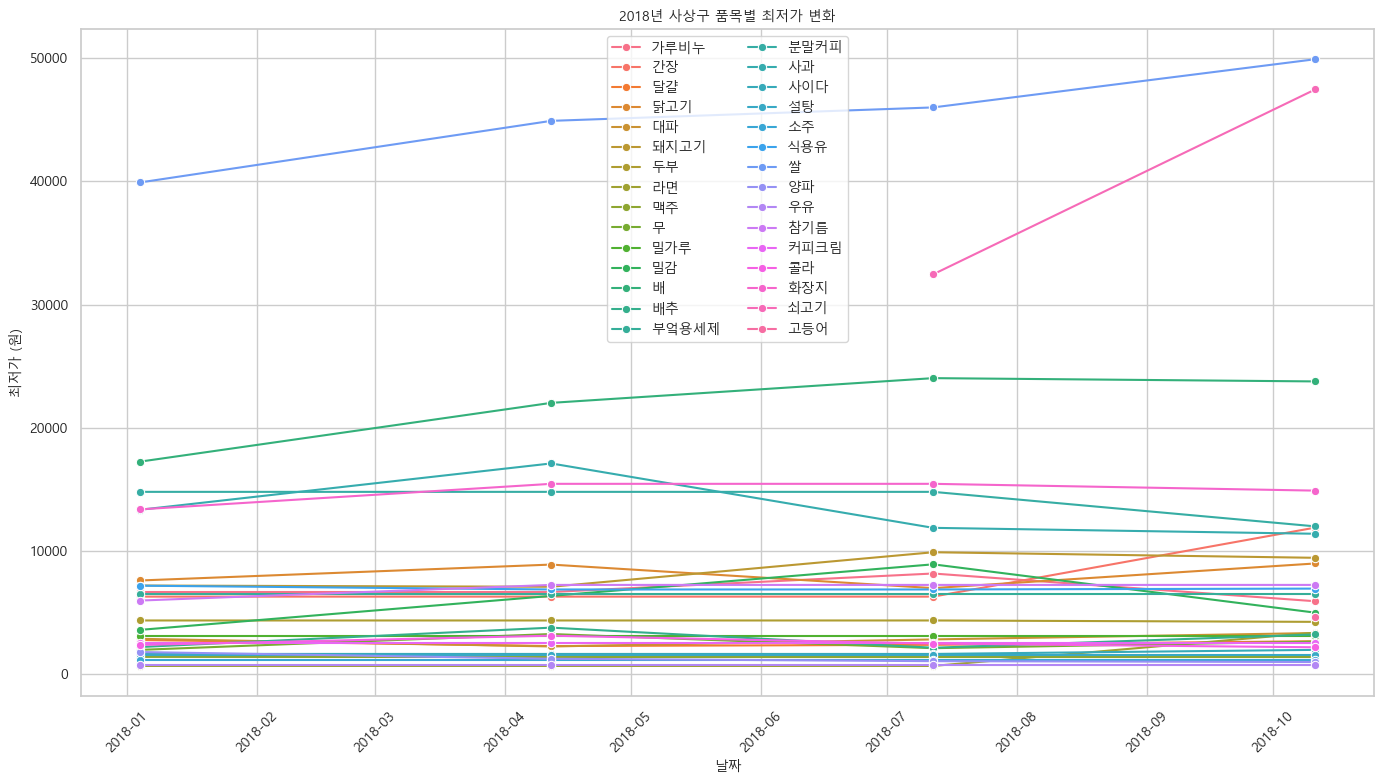

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("사상구2018_1q.csv")
q2 = pd.read_csv("사상구2018_2q.csv")
q3 = pd.read_csv("사상구2018_3q.csv")
q4 = pd.read_csv("사상구2018_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2018년 사상구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("사상구2018_min.csv", index=False, encoding="utf-8-sig")

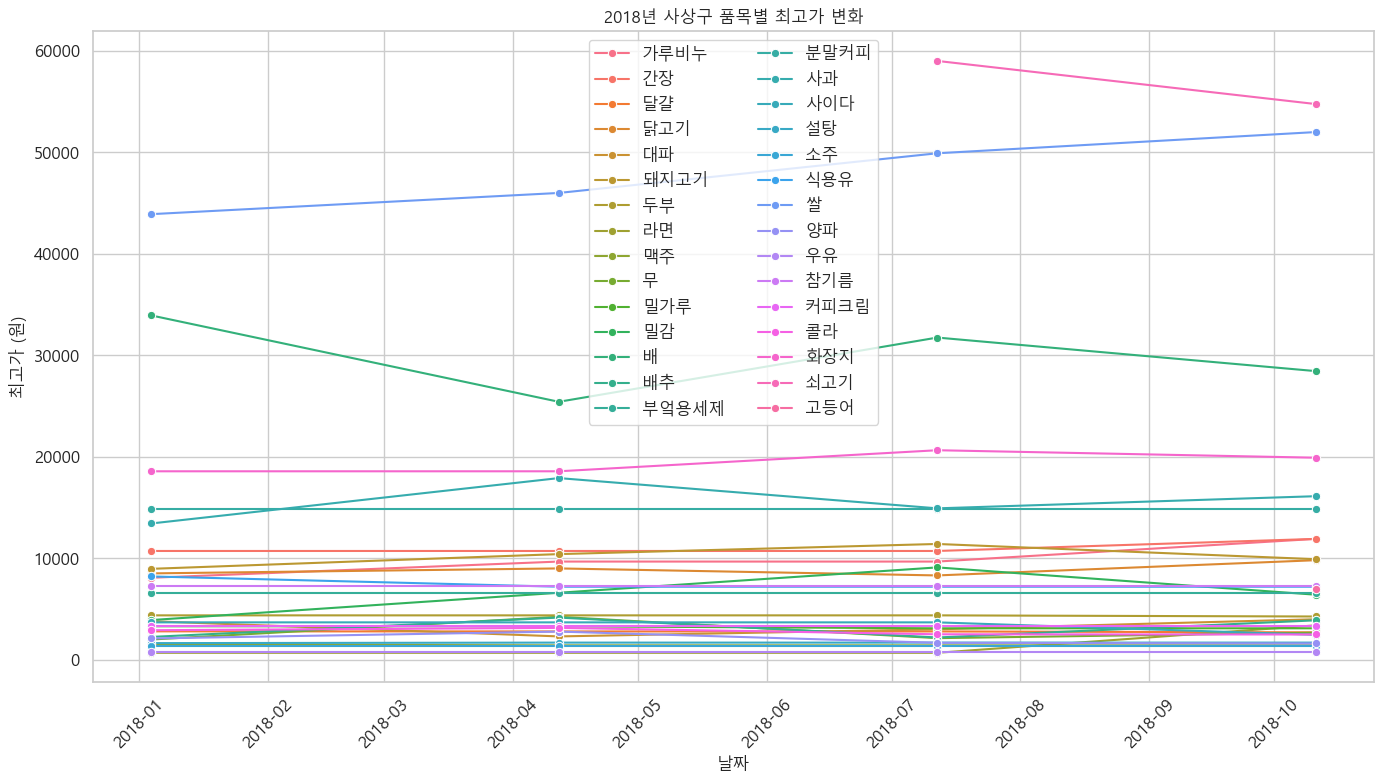

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("사상구2018_1q.csv")
q2 = pd.read_csv("사상구2018_2q.csv")
q3 = pd.read_csv("사상구2018_3q.csv")
q4 = pd.read_csv("사상구2018_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2018년 사상구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("사상구2018_max.csv", index=False, encoding="utf-8-sig")